In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
cancer=sklearn.datasets.load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['target']=cancer.target

In [3]:
x=df.drop('target',axis=1)
y=df['target']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y,random_state=42)

In [5]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
class perceptron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def model(self,x):
        return 1 if (np.dot(self.w,x)>=self.b) else 0
        
    def predict(self, X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
        
    def fit(self, X,Y):
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        for x,y in zip(X,Y):
            y_pred = self.model(x)
            if y==1 and y_pred ==0:
                self.w = self.w+x
                self.b = self.b+1
            elif y==0 and y_pred==1:
                self.w = self.w-x
                self.b = self.b-1
        

In [8]:
pt=perceptron()

In [9]:
pt.fit(x_train,y_train)

In [10]:
y_pred_train = pt.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.46373626373626375

In [11]:
y_pred_test = pt.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.45614035087719296

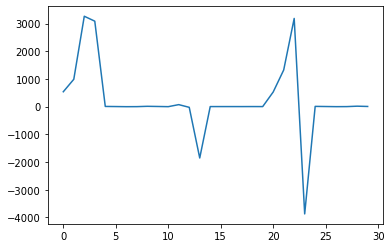

In [12]:
plt.plot(pt.w)
plt.show()

# EPOCH


In [13]:
class perceptron1:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def model(self,x):
        return 1 if (np.dot(self.w,x)>=self.b) else 0
        
    def predict(self, X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
        
    def fit(self, X,Y,epoch=1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy={}
        
        for i in range(epoch):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y==1 and y_pred ==0:
                    self.w = self.w+x
                    self.b = self.b+1
                elif y==0 and y_pred==1:
                    self.w = self.w-x
                    self.b = self.b-1
            accuracy[i]=accuracy_score(self.predict(X),Y)
        plt.plot(list(accuracy.values()))
        plt.show()
         

In [14]:
pt1=perceptron1()

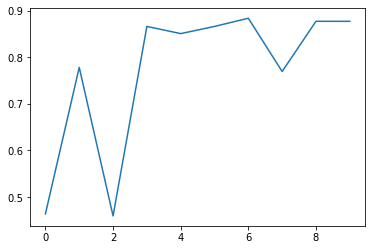

In [15]:
pt1.fit(x_train,y_train,10)

In [16]:
y_pred_train1 = pt1.predict(x_train)
accuracy_score(y_train,y_pred_train1)

0.8769230769230769

In [17]:
y_pred_test1 = pt1.predict(x_test)
accuracy_score(y_test,y_pred_test1)

0.8596491228070176

# LEARNING RATE and check for max accuracy

In [18]:
class perceptron2:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def model(self,x):
        return 1 if (np.dot(self.w,x)>=self.b) else 0
        
    def predict(self, X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
        
    def fit(self, X,Y,epoch=1,lr=0.1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy={}
        max_accuracy = 0
        
        for i in range(epoch):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y==1 and y_pred ==0:
                    self.w = self.w+ lr*x
                    self.b = self.b+ lr*1
                elif y==0 and y_pred==1:
                    self.w = self.w- lr*x
                    self.b = self.b- lr*1
                    
            accuracy[i]=accuracy_score(self.predict(X),Y)
            if accuracy[i] > max_accuracy:
                max_accuracy=accuracy[i]
                chkptw = self.w
                chkptb = self.b
        self.w = chkptw
        self.b = chkptb
        print(max_accuracy)
                
            
        plt.plot(list(accuracy.values()))
        plt.ylim([0,1])
        plt.show()
         

0.8879120879120879


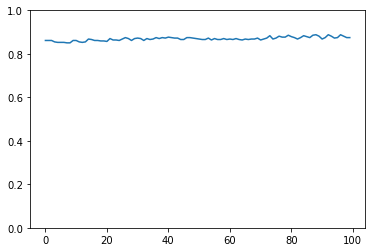

In [19]:
pt2=perceptron2()
pt2.fit(x_train,y_train,100,0.00001)

In [20]:
y_pred_test2 = pt2.predict(x_test)
accuracy_score(y_test,y_pred_test2)

0.8947368421052632

In [21]:
iris=sklearn.datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target

In [22]:
x=df.drop('target',axis=1)
y=df['target']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y,random_state=42)

In [24]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values

0.3333333333333333


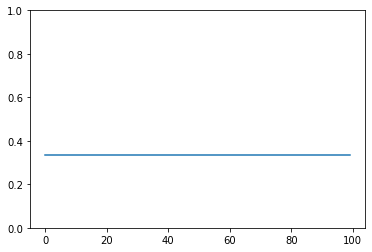

In [25]:
pt2=perceptron2()
pt2.fit(x_train,y_train,100,0.00001)